In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

In [15]:
sampling_rate = 1000000
sample_duration = 0.01
time = np.linspace(0, sample_duration, int(sampling_rate * sample_duration))
amplitude = 1

# generate 1000 sine waves
num_waves = 1000
frequency = np.random.uniform(0, 100000, num_waves)
sine_waves = [np.sin(2 * np.pi * f * time) for f in frequency]


Frequency: 45795.853817797004


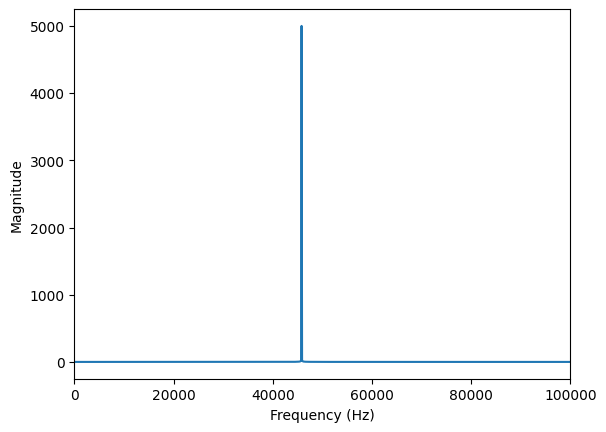

In [20]:
def generate_fft_plot(input_signal, sampling_rate):
    fft = np.fft.fft(input_signal)
    fft_modulus = np.abs(fft)
    freqs = np.fft.fftfreq(len(fft_modulus), 1/sampling_rate)

    plt.figure()
    plt.plot(freqs[:len(freqs)//2], fft_modulus[:len(freqs)//2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 100000)

print(f"Frequency: {frequency[1]}")    
generate_fft_plot(sine_waves[1], sampling_rate)

In [53]:
# Open the saved image and process it
img = Image.open("fft_plot.png")
img = img.convert("RGB")  # Ensure the image is in RGB mode

img_array = np.array(img)

# Extract RGB channels
# To crop the image, we slice the array on the rows and the colums
red_channel = img_array[80:520, 135:890, 0]
green_channel = img_array[80:520, 135:890, 1]
blue_channel = img_array[80:520, 135:890, 2]
    

# Apply threshold to create a binary image where blue is dominant over red and green
sensitivity = 70  # Threshold for blue dominance
blue_dominance = (blue_channel > red_channel + sensitivity) & (blue_channel > green_channel + sensitivity)

#Convert the boolean array to an image (black and white)
binary_image = Image.fromarray((blue_dominance * 255).astype(np.uint8))  # Multiply by 255 to get full range of black and white

# Save the binary image
binary_image.save("binary_fft_plot.png")

# Optionally, show the binary image using PIL
binary_image.show()

In [61]:
# Open the saved image and process it

img = Image.open("fft_plot.png")
img = img.convert("RGB")  # Ensure the image is in RGB mode

img_array = np.array(img)

# Extract RGB channels
# To crop the image, we slice the array on the rows and the colums
red_channel = img_array[80:520, 135:890, 0]
green_channel = img_array[80:520, 135:890, 1]
blue_channel = img_array[80:520, 135:890, 2]
    

# Apply threshold to create a binary image where blue is dominant over red and green
sensitivity = 70  # Threshold for blue dominance
blue_dominance = (blue_channel > red_channel + sensitivity) & (blue_channel > green_channel + sensitivity)

#Convert the boolean array to an image (black and white)
binary_image = Image.fromarray((blue_dominance * 255).astype(np.uint8))  # Multiply by 255 to get full range of black and white

# Save the binary image
binary_image.save("binary_fft_plot.png")

# Optionally, show the binary image using PIL
binary_image.show()